In [1]:
import accelerator_environments.envs.ares.ARESlatticeStage3v1_9 as ares
from accelerator_environments.utils import subcell_of
import joss
import numpy as np
import ocelot as oc
import ocelot.adaptors.astra2ocelot as oca

initializing ocelot...


In [2]:
cell = subcell_of(ares.cell, "AREASOLA1", "ARMRBSCR1")
segment = joss.Segment.from_ocelot(cell)

In [3]:
# particles = joss.random_particles(n=int(1e+5), sigma_x=175e-6, sigma_y=175e-6, sigma_p=0.0)
p_array_astra = oca.astraBeam2particleArray("ACHIP_EA1_2021.1351.001")
beam = joss.Beam.from_ocelot(p_array_astra)

Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  13.50890653269  m
parray = ParticleArray: 
Ref. energy : 0.1073 GeV 
Ave. energy : 0.1074 GeV 
std(x)      : 0.175 mm
std(px)     : 0.004 mrad
std(y)      : 0.175 mm
std(py)     : 0.004 mrad
std(p)      : 0.0023
std(tau)    : 0.008 mm
Charge      : 0.0005 nC 
s pos       : 13.50890653269 m 
n particles : 100000



In [4]:
segment.AREAMQZM1.k1 = 4.13 # -0.9964350504414721
segment.AREAMQZM2.k1 = -6.93 # -3.6658567102988844
segment.AREAMQZM3.k1 = 2.99 # 5.203214488709113
# segment.AREAMCVM1.angle = 0
# segment.AREAMCHM1.angle = 1e-3

In [5]:
segment(beam)

Went with skippable


Beam(n=100000, mu_x=3.5047990815567553e-07, mu_xp=-7.728952825840439e-08, mu_y=-5.545619209401454e-07, mu_yp=2.4446876761161866e-07, sigma_x=1.7932186261120267e-05, sigma_xp=2.5437503560198114e-05, sigma_y=1.437411387479565e-05, sigma_yp=3.186817971033672e-05, sigma_s=8.061501837952375e-06, sigma_p=0.0022804419285372707, energy=107315902.44355117)

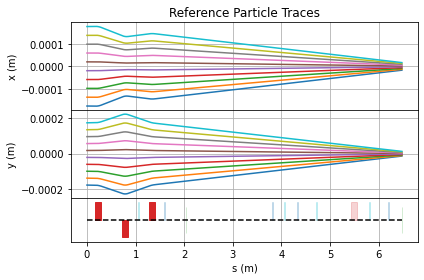

In [6]:
segment.plot_overview(beam=beam)